In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

# 1. Градиентный спуск с постоянным шагом

In [4]:
alpha = 5
def f1(x, y):
    return alpha * (x - 5) ** 2 + (y - 7) ** 2

def grad(x, y):
    return [2 * alpha * (x  - 5), 2 * (y - 7)]

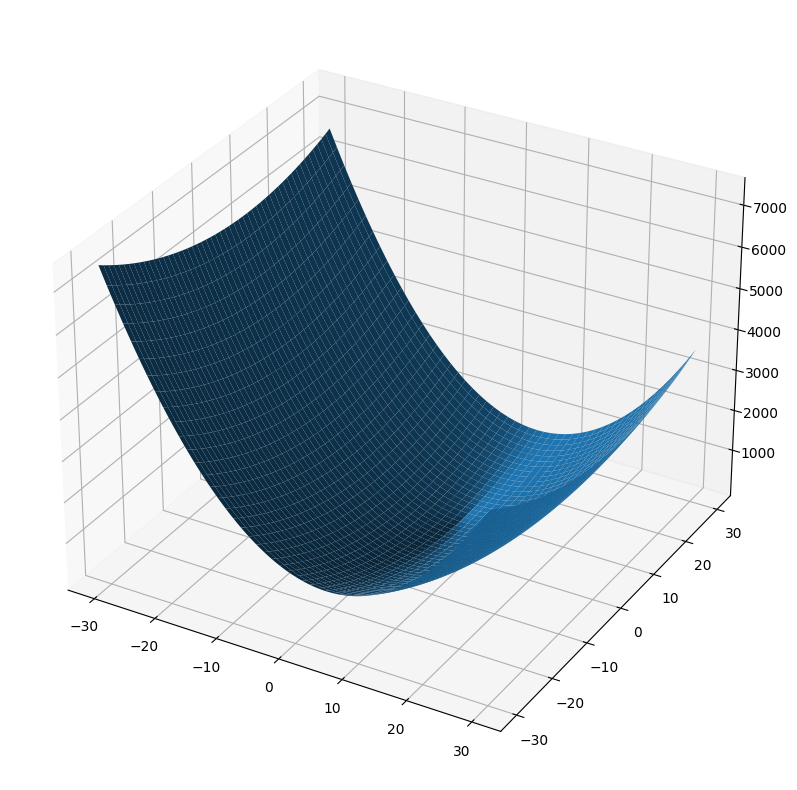

In [33]:
t = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f1(X, Y))


In [34]:
def gradient_descent(f, grad, x, eps = 0.05, lr=0.05):

  points = []
  points.append(x)
  grad_cnt = 0
  for i in range(1, 100):
      x = x - lr * np.array(grad(x[0], x[1]))
      points.append(x)
      grad_cnt += 1
      if np.linalg.norm(x - points[i-1]) < eps:
        break

  points = np.array(points)
  print(points)
  plt.plot(points[:, 0], points[:, 1], 'o-')
  plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

[[-10.          10.        ]
 [ -2.5          9.7       ]
 [  1.25         9.43      ]
 [  3.125        9.187     ]
 [  4.0625       8.9683    ]
 [  4.53125      8.77147   ]
 [  4.765625     8.594323  ]
 [  4.8828125    8.4348907 ]
 [  4.94140625   8.29140163]
 [  4.97070312   8.16226147]
 [  4.98535156   8.04603532]
 [  4.99267578   7.94143179]
 [  4.99633789   7.84728861]
 [  4.99816895   7.76255975]
 [  4.99908447   7.68630377]
 [  4.99954224   7.6176734 ]
 [  4.99977112   7.55590606]
 [  4.99988556   7.50031545]
 [  4.99994278   7.45028391]
 [  4.99997139   7.40525552]]


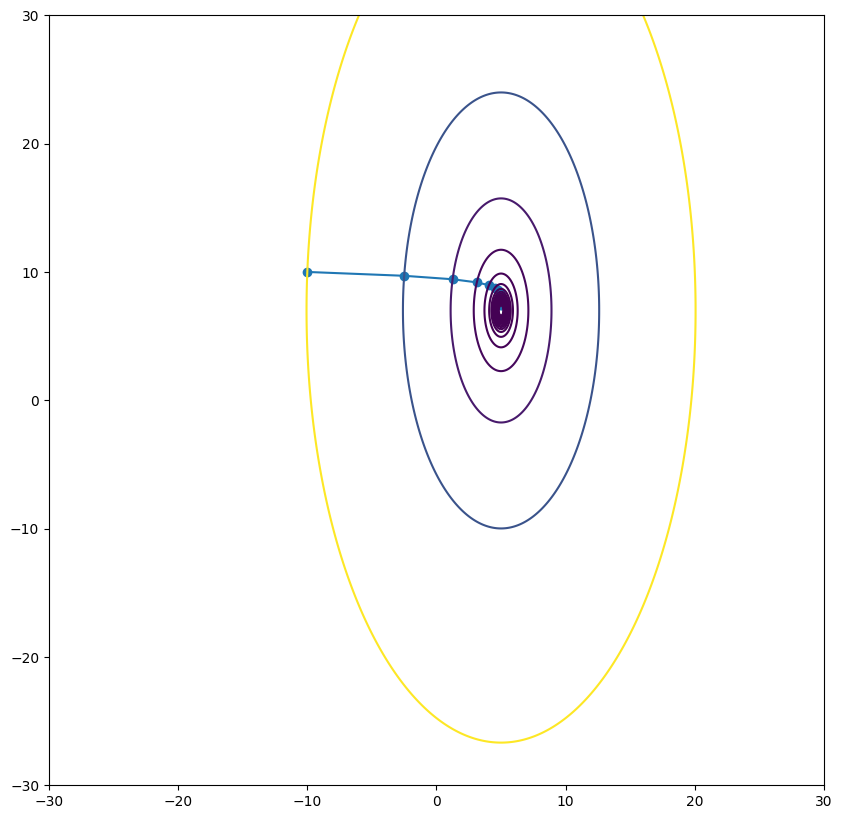

In [35]:
gradient_descent(f1, grad, [-10,10])

# 2. Метод дихотомии 


In [8]:
def f2(x, y):
  return (x+10)**2 + (y+10)**2

def grad_f2(x, y):
  return [2 * (x+10), 2 * (y+10)]

TypeError: quadratic_function.<locals>.<lambda>() takes 1 positional argument but 2 were given

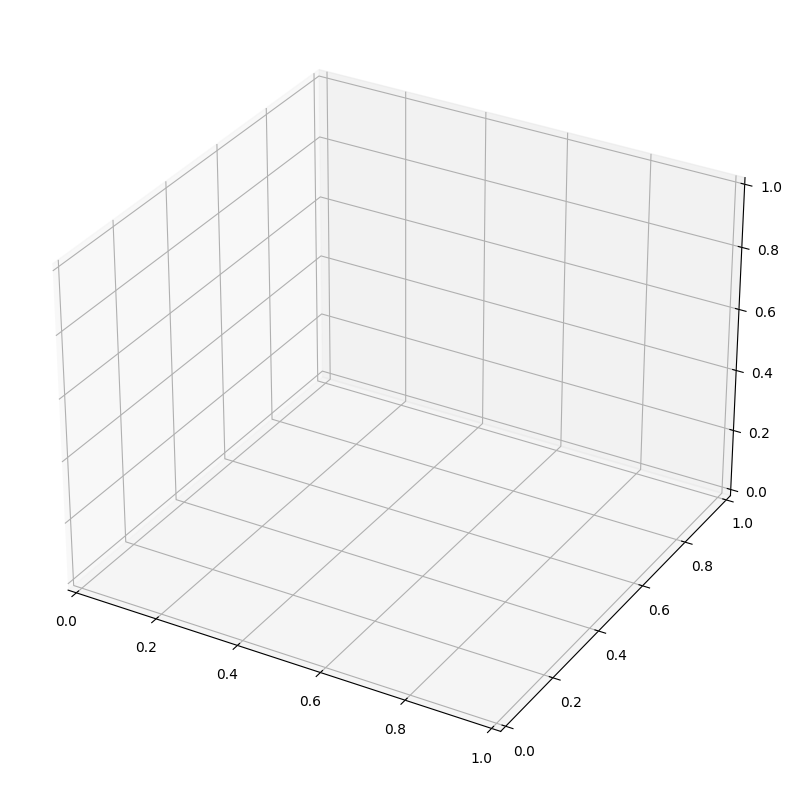

In [36]:

  t = np.linspace(-30, 30, 1000)
  X, Y = np.meshgrid(t, t)
  ax = plt.figure().add_subplot(projection='3d')
  ax.plot_surface(X, Y, f(X, Y))

In [37]:
def dichotomy_method(f, grad, current, res_eps, eps):
  func_cnt = 0
  grad_cnt = 0
  points = []
  current = np.asarray(current)
  points.append(current)

  while True:
    grad_cnt += 1
    interval = [current, current - 5 * np.array(grad(current[0], current[1]))]
    a, b = interval[0], interval[1]
    x = (a + b) / 2
    while np.linalg.norm(b - a) > eps:
      left = x - eps
      right = x + eps
      func_cnt += 2
      f1, f2 = f(left[0], left[1]), f(right[0], right[1])
      if f1 < f2:
        b = x
      else:
        a = x
      x = (a + b) / 2
    points.append(x)
    if np.linalg.norm(x - current) < res_eps:
      break
    current = x

  print("Gradient calculation count: ", grad_cnt)
  print("Function calculation count: ", func_cnt)
  points = np.array(points)
  print(points)
  plt.plot(points[:, 0], points[:, 1], 'o-')
  plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

Gradient calculation count:  5
Function calculation count:  72
[[ -20.           30.        ]
 [  79.99694824 -369.98779297]
 [ -10.00205987   -9.99176053]
 [  -9.98661087  -10.05355653]
 [  -9.99916318  -10.00334728]
 [ -10.00334728   -9.98661087]]


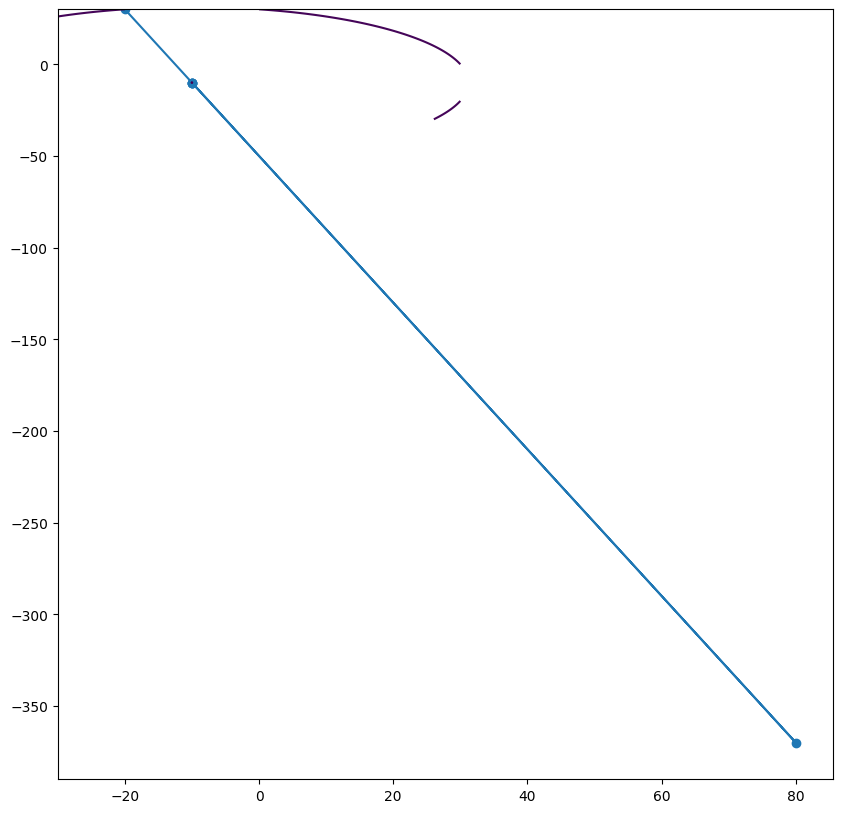

In [38]:
dichotomy_method(f2, grad_f2, [-20, 30], 0.05, 0.05)

# 5. Генератор случайных квадратичных функций

In [11]:
def generate_matrix(n, k):
  k = k ** 0.5
  A = 10 * np.random.rand(n, n)
  U, s, V = np.linalg.svd(A) #svd decomposition
  max_l = 10 * np.random.rand()
  min_l = max_l / k
  s = np.random.uniform(low=min_l, high=max_l, size=n)
  s[0] = min_l
  s[n - 1] = max_l
  S = np.diag(s)
  A = U.dot(S).dot(V.T)
  A = A.T.dot(A) # positive-semidefinite
  return A


def quadratic_function(n, k):
  A = generate_matrix(n, k)
  return lambda x: np.array(x).dot(A).dot(x), lambda x: 2 * A.dot(x)  

print(np.linalg.cond(generate_matrix(2, 100)))
func, gr = quadratic_function(2, 2)
print(func([0, 0]))
print(gr([1, 2]))

100.00000000000024
0.0
[ 89.89080891 126.2568406 ]


N-мерный градиентный спуск

In [12]:
def gradient_descent(n, f, grad, eps=1e-3, lr=0.01):
  start = np.full(n, 10)
  zeros = np.zeros(n)
  prev_x = start
  cur_x = prev_x - lr * np.array(grad(prev_x))
  c = 1
  while abs(f(prev_x) - f(cur_x)) > eps:
    prev_x = cur_x
    cur_x = prev_x - lr * np.array(grad(prev_x))
    c += 1
  return c

In [ ]:
X, Y = np.arange(2, 1001), np.arange(2, 1001)
for n in X:
  av = 0
  for i in range(500):
    f, g = quadratic_function(n, 2)
    av += gradient_descent(n, f, g)
  Y[n - 2] = av / 500

KeyboardInterrupt: 

In [ ]:
  plt.plot(X, Y)
  plt.xlabel("Number of dimensions")
  plt.ylabel("Number of steps")

In [ ]:
X, Y = np.arange(1, 1001), np.arange(1, 1001)
for k in X:
  av = 0
  for i in range(500):
    f, g = quadratic_function(2, k)
    av += gradient_descent(2, f, g)
  Y[n - 1] = av / 500

In [ ]:
  plt.plot(X, Y)
  plt.xlabel("Conditional number")
  plt.ylabel("Number of steps")